In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.set_random_seed(1)
np.random.seed(1)

In [3]:
N_SAMPLES = 20
N_HIDDEN = 300
LR = 0.01

In [4]:
x = np.linspace(-1, 1, N_SAMPLES)[:, np.newaxis]
y = x + 0.3 * np.random.randn(N_SAMPLES)[:, np.newaxis]

In [6]:
test_x = x.copy()
test_y = test_x + 0.3 * np.random.randn(N_SAMPLES)[:, np.newaxis]

In [7]:
%matplotlib inline

(-2.5, 2.5)

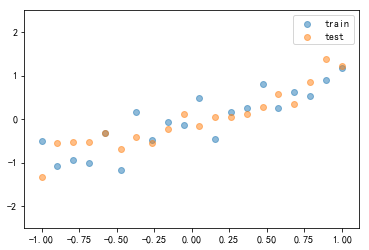

In [17]:
plt.scatter(x, y, alpha=0.5, label="train")
plt.scatter(test_x, test_y, alpha=0.5, label="test")
plt.legend(loc="best")
plt.ylim((-2.5, 2.5))

In [19]:
tf_x = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])
tf_is_training = tf.placeholder(tf.bool, None)

overfitting net

In [21]:
o1 = tf.layers.dense(tf_x, N_HIDDEN, tf.nn.relu)
o2 = tf.layers.dense(o1, N_HIDDEN, tf.nn.relu)
o_out = tf.layers.dense(o2, 1)
o_loss = tf.losses.mean_squared_error(tf_y, o_out)
o_train = tf.train.AdamOptimizer(LR).minimize(o_loss)

dropout net

In [22]:
d1 = tf.layers.dense(tf_x, N_HIDDEN, tf.nn.relu)
d1 = tf.layers.dropout(d1, rate=0.5, training=tf_is_training)
d2 = tf.layers.dense(d1, N_HIDDEN, tf.nn.relu)
d2 = tf.layers.dropout(d2, rate=0.5, training=tf_is_training)
d_out = tf.layers.dense(d2, 1)
d_loss = tf.losses.mean_squared_error(tf_y, d_out)
d_train = tf.train.AdamOptimizer(LR).minimize(d_loss)

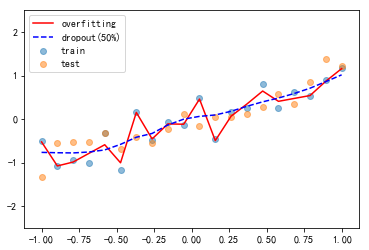

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    plt.ion()
    for t in range(500):
        sess.run([o_train, d_train], {tf_x: x, tf_y: y, tf_is_training: True})
        
        if t % 10 == 0:
            plt.cla()
            o_loss_, d_loss_, o_out_, d_out_ = sess.run(
                [o_loss, d_loss, o_out, d_out], {tf_x: test_x, tf_y: test_y, tf_is_training: False}
            )
            plt.scatter(x, y, alpha=0.5, label="train")
            plt.scatter(test_x, test_y, alpha=0.5, label="test")
            plt.plot(test_x, o_out_, "r-", label="overfitting")
            plt.plot(test_x, d_out_, "b--", label="dropout(50%)")
            plt.legend(loc="best")
            plt.ylim((-2.5, 2.5))